https://www.kaggle.com/code/pullurilikith/handwritten-text-recognizer

In [ ]:
!pip install imutils

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [4]:
dir = "../input/handwritten-characters/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [6]:
len(train_data)

140000

In [7]:
val_dir = "../input/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [8]:
len(val_data)

15209

In [9]:
random.shuffle(train_data)
random.shuffle(val_data)

In [10]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [11]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [12]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [13]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [14]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [15]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [16]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

2023-01-06 08:21:47.058887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 08:21:47.159352: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 08:21:47.160185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 08:21:47.161648: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0

In [19]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [20]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=64, validation_data = (val_X, val_Y),  verbose=1)

2023-01-06 08:22:16.088407: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-06 08:22:17.531880: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2188/2188 [==============================] - 17s 4ms/step - loss: 0.6720 - accuracy: 0.7871 - val_loss: 0.3213 - val_accuracy: 0.8983
Epoch 2/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.3558 - accuracy: 0.8817 - val_loss: 0.2628 - val_accuracy: 0.9141
Epoch 3/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.3087 - accuracy: 0.8951 - val_loss: 0.2560 - val_accuracy: 0.9167
Epoch 4/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.2820 - accuracy: 0.9035 - val_loss: 0.2291 - val_accuracy: 0.9248
Epoch 5/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.2618 - accuracy: 0.9092 - val_loss: 0.2499 - val_accuracy: 0.9131
Epoch 6/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.2498 - accuracy: 0.9131 - val_loss: 0.2406 - val_accuracy: 0.9085
Epoch 7/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.2374 - accuracy: 0.9173 - val_loss: 0.2455 - val_accuracy: 0.9069
Ep

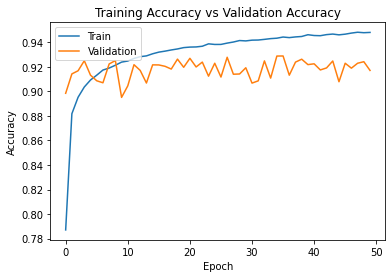

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

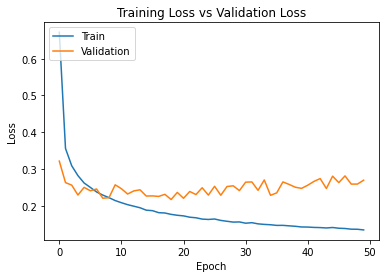

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Recognition and Post-Processing 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [23]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    
    return (cnts, boundingBoxes)

In [25]:
def get_letters(img):
    letters = []
    total_bbox_cordi = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            print([x,y,w,h])
            single_bbox_cordi = [x,y,w,h]
            total_bbox_cordi.append(single_bbox_cordi)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image, total_bbox_cordi



In [26]:
def get_word(letter):
    word = "".join(letter)
    return word

[10, 15, 14, 17]
[26, 16, 10, 16]
[44, 15, 11, 17]
[62, 19, 11, 13]
[82, 15, 12, 18]
BENE5
[[10, 15, 14, 17], [26, 16, 10, 16], [44, 15, 11, 17], [62, 19, 11, 13], [82, 15, 12, 18]]


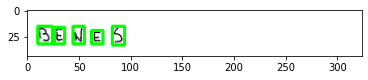

In [27]:
letter,image, total_bbox_cordi = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[19, 11, 11, 13]
[30, 10, 12, 14]
[49, 11, 13, 14]
[65, 10, 15, 14]
[81, 9, 12, 16]
LIL0U
[[19, 11, 11, 13], [30, 10, 12, 14], [49, 11, 13, 14], [65, 10, 15, 14], [81, 9, 12, 16]]


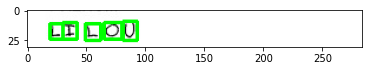

In [28]:
letter,image,total_bbox_cordi = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[20, 8, 8, 14]
[35, 8, 10, 13]
[51, 9, 10, 16]
[66, 5, 12, 18]
[82, 8, 10, 18]
[97, 9, 12, 16]
[112, 10, 12, 17]
JAFFEUX
[[20, 8, 8, 14], [35, 8, 10, 13], [51, 9, 10, 16], [66, 5, 12, 18], [82, 8, 10, 18], [97, 9, 12, 16], [112, 10, 12, 17]]


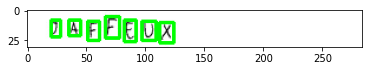

In [29]:
letter,image, total_bbox_cordi = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[18, 8, 13, 19]
[33, 9, 12, 18]
[50, 8, 14, 18]
[65, 7, 15, 18]
RUPP
[[18, 8, 13, 19], [33, 9, 12, 18], [50, 8, 14, 18], [65, 7, 15, 18]]


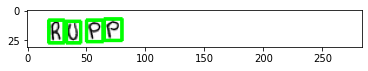

In [30]:
letter,image,total_bbox_cordi = get_letters("../input/handwriting-recognition/validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[9, 15, 14, 16]
[28, 12, 13, 18]
[48, 13, 11, 17]
[65, 12, 13, 18]
[80, 13, 16, 16]
[99, 14, 13, 15]
[113, 14, 15, 17]
[135, 14, 13, 16]
[151, 13, 13, 17]
VALENTTNE
[[9, 15, 14, 16], [28, 12, 13, 18], [48, 13, 11, 17], [65, 12, 13, 18], [80, 13, 16, 16], [99, 14, 13, 15], [113, 14, 15, 17], [135, 14, 13, 16], [151, 13, 13, 17]]


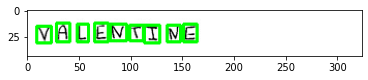

In [31]:
letter,image, total_bbox_cordi = get_letters("../input/handwriting-recognition/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

In [32]:
letter

['V', 'A', 'L', 'E', 'N', 'T', 'T', 'N', 'E']

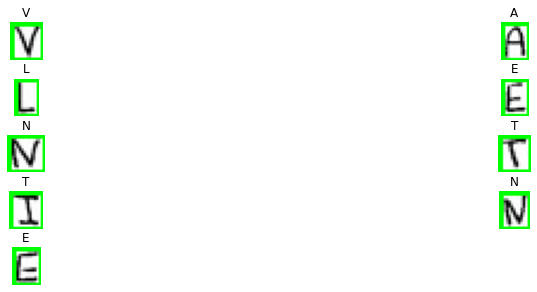

In [33]:
plt.figure(figsize=(15, 10))
for i in range(0,len(total_bbox_cordi)):
    ax = plt.subplot(10, 2, i+1)
    t =total_bbox_cordi[i]
    x_min = t[0]
    y_min = t[1]
    w_min = t[2]
    h_min= t[3]
    cropped_image = image[y_min:y_min+h_min, x_min:x_min+w_min]
    plt.title(letter[i], fontsize=12)
    plt.imshow(cropped_image)
    plt.axis('off')
plt.subplots_adjust(wspace=0.4, hspace=0.5)

In [34]:
# !mkdir -p saved_model
# model.save('saved_model/my_model')
model.save('final_model.h5')

2023-01-06 08:40:16.568213: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
